# EDA Facebook Full Funnel Campaign

## Table of Contents

- Introduction
- Exploratory Data Analysis
- Part I - Campaigns
- Part II - Audiences
- Part III - Age
- Conclusion & Business Insights

# Introduction

The data is from Facebook Campaign I did for a company to promote and sell their e-commerce female products via one landing page. \
The objective EDA was to analyze the performance of the campaign parameters, including age, audiences, interests, impressions, and cost of conversion, to identify areas for optimization.

Campaign Funnel has 3 Levels
1. P - Prospecting (Top) – Broad and interests targeting new potential customers to generate initial interest in a product.
2. RE - Reengagement (Middle) – Targeting users who take any action on one of posts on products Facebook Page. For example clicking likes, comments, shares, viewing a video or clicking on a link.
3. R - Remarketing (Bottom) - Targeting user that had visited a website or added product to a cart or did initial checkout. Remarketing campaigns typically focus on reminding customers to complete a purchase, and providing personalized offers.

Here are Descriptions of Features

1. Campaign - Level of the funnel.
2. Audiences - Unique audience ID's.
3. Ad - Unique ad ID's.
4. Age - Age of a user.
7. Impressions - Number of times the ad was shown.
8. Clicks - Number of clicks on Ad.
9. Spent - Amount spent to show that ad.
10. Conversions - Total number of people who bought a product.

In [147]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [148]:
# Import data from CVS
df = pd.read_csv('Fb_Campaign.csv')

In [149]:
df.head()

,Campaign ID,Ad set ID,Ad ID,Age,Impressions,Link clicks,Amount spent (PLN),Purchases
0,P,3,23852454381700446,35-44,11746,285.0,461.79,4.0
1,RE,7,23852453709610446,45-54,1648,27.0,73.26,3.0
2,RE,4,23852453709430446,35-44,8006,67.0,225.21,2.0
3,RE,4,23852453709470446,25-34,1465,19.0,24.81,2.0
4,RE,7,23852453709540446,45-54,5499,191.0,283.52,2.0


In [150]:
# Rename feature names of data for better workflow and visualisation
df.rename(columns={'Campaign ID':'Campaign', 'Ad set ID':'Audiences', 'Ad ID':'Ad',
                     'Amount spent (PLN)':'Spent', 'Link clicks':'Clicks','Purchases':'Conversions'}, inplace=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Campaign     1086 non-null   object 
 1   Audiences    1086 non-null   int64  
 2   Ad           1086 non-null   int64  
 3   Age          1086 non-null   object 
 4   Impressions  1086 non-null   int64  
 5   Clicks       670 non-null    float64
 6   Spent        1078 non-null   float64
 7   Conversions  51 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 68.0+ KB


In [152]:
# Check if data contain missing values and count the number of missing and non-missing values
df.isnull().sum()

Campaign          0
Audiences         0
Ad                0
Age               0
Impressions       0
Clicks          416
Spent             8
Conversions    1035
dtype: int64

In [153]:
# Repalce missing values with zero because some campaigns had no link clicks or purchases
df.fillna(0, inplace=True)

# EDA

In [154]:
df.shape

(1086, 8)

Dataset contains 1086 observations and 8 features.

In [155]:

df.describe()

,Audiences,Ad,Impressions,Clicks,Spent,Conversions
count,1086.000000,1.086000e+03,1086.000000,1086.000000,1086.000000,1086.000000
mean,5.620626,2.385246e+16,559.424494,6.558932,17.045866,0.057090
std,3.631873,1.461464e+10,1315.826099,20.997207,38.665765,0.285535
min,0.000000,2.385244e+16,1.000000,0.000000,0.000000,0.000000
25%,3.000000,2.385245e+16,34.000000,0.000000,0.992500,0.000000
50%,6.000000,2.385245e+16,140.000000,1.000000,4.290000,0.000000
75%,9.000000,2.385245e+16,515.750000,4.000000,16.257500,0.000000
max,11.000000,2.385249e+16,18440.000000,297.000000,461.790000,4.000000


A large standard deviation in impressions indicates that some ads recieve definitely much more impressions than others.

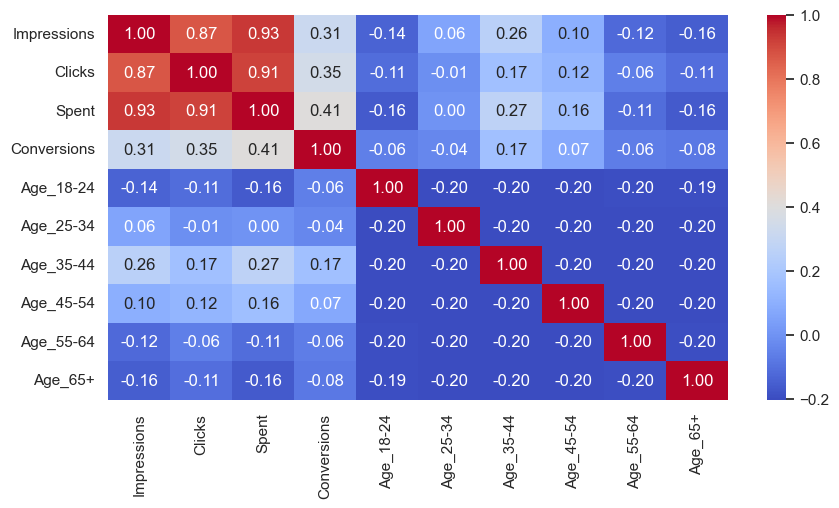

In [156]:
# Plot a heatmap with seaborn
plt.figure(figsize=(10,5))

# Convert categorical variable into dummy/indicator variables
df1 = pd.get_dummies(df, columns = ['Age'])

# Remove Ad and Audiences features because their numerical values are arbitrary for correlation
x=sns.heatmap(df1[df1.columns.difference(['Audiences','Ad'],sort=False)]
              .corr(),annot=True ,fmt=".2f", cmap="coolwarm")

It is clear that clicks and conversions are positively correlated with 35-44 and 45-54 age groups, which means these users are a substantial target.

# Part I - Campaigns

In [157]:
df["Campaign"].unique()

array(['P', 'RE', 'R'], dtype=object)

Here, we see there are 3 ad campaigns structure in the funnel (P - Prospecting, RE - Reengagement, R - Remarketing).

In [158]:
df.head()

,Campaign,Audiences,Ad,Age,Impressions,Clicks,Spent,Conversions
0,P,3,23852454381700446,35-44,11746,285.0,461.79,4.0
1,RE,7,23852453709610446,45-54,1648,27.0,73.26,3.0
2,RE,4,23852453709430446,35-44,8006,67.0,225.21,2.0
3,RE,4,23852453709470446,25-34,1465,19.0,24.81,2.0
4,RE,7,23852453709540446,45-54,5499,191.0,283.52,2.0


Which campaign has the most number of ads?

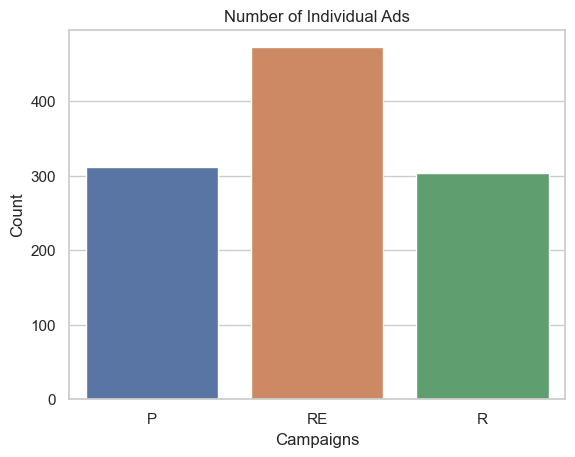

In [159]:
sns.countplot(x ='Campaign', data = df).set_title('Number of Individual Ads')
plt.xlabel("Campaigns")
plt.ylabel("Count")
plt.show()

Which campaign has the most impressions of ads?

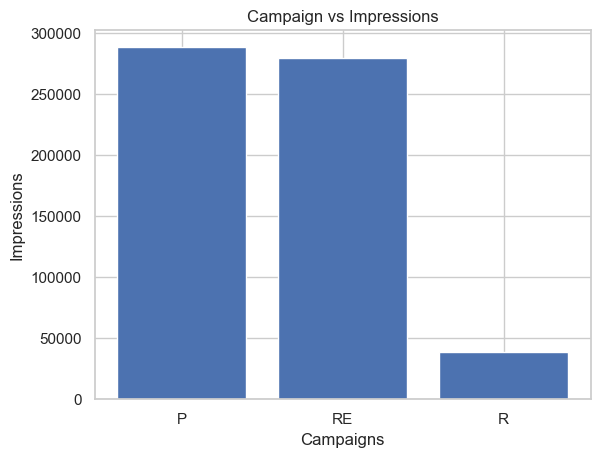

In [160]:
campSum = df.groupby(by=['Campaign'], sort=False).sum()
plt.bar(campSum.index, campSum["Impressions"])
plt.xlabel("Campaigns")
plt.ylabel("Impressions")
plt.title("Campaign vs Impressions")
plt.show()

Which campaign has spent the most?

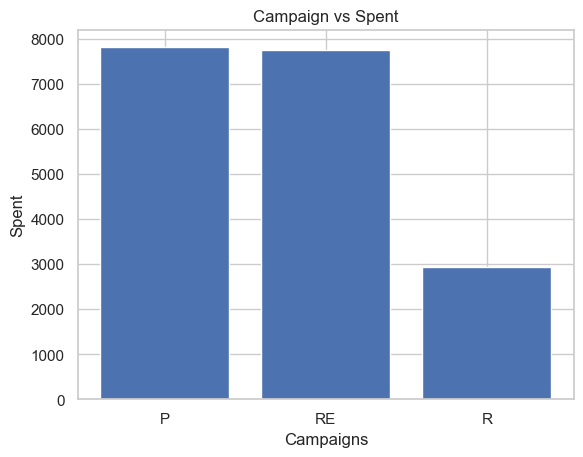

In [161]:
plt.bar(campSum.index, campSum["Spent"])
plt.xlabel("Campaigns")
plt.ylabel("Spent")
plt.title("Campaign vs Spent")
plt.show()

Which campaign converted the best?

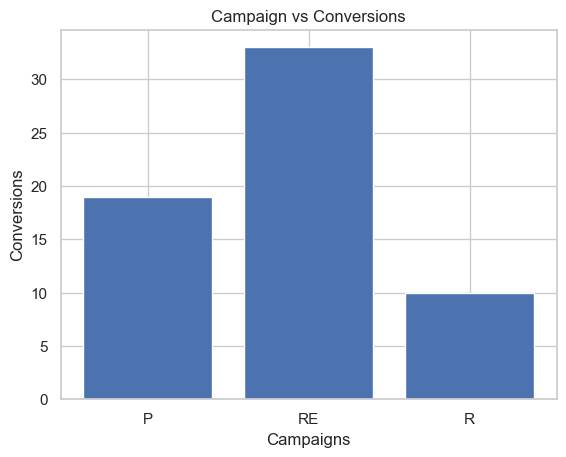

In [162]:
campSum = df.groupby(by=['Campaign'], sort=False).sum()
plt.bar(campSum.index, campSum["Conversions"])
plt.xlabel("Campaigns")
plt.ylabel("Conversions")
plt.title("Campaign vs Conversions")
plt.show()

Which campaign has the highest CTR?

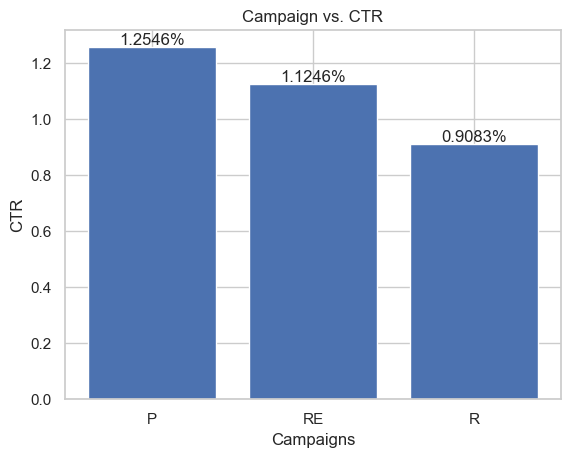

In [163]:
campCTR = campSum['Clicks']/campSum['Impressions'] * 100

plt.bar(campCTR.index, campCTR)
plt.xlabel("Campaigns")
plt.ylabel("CTR")
plt.title("Campaign vs. CTR")

for x,y in zip(campCTR.index, campCTR):
    label = "{:.4f}%".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center')
plt.show()

Which Campaign has the highest Conversion Rate?

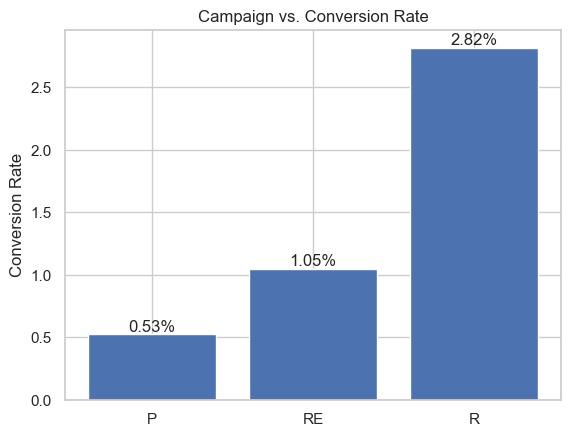

In [164]:
campConv = campSum['Conversions']/campSum['Clicks']*100
# Creating our bar plot
plt.bar(campConv.index, campConv)
plt.ylabel("Conversion Rate")
plt.title("Campaign vs. Conversion Rate")
for x,y in zip(campConv.index, campConv):

    label = "{:.2f}%".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [165]:
OverallConversionRate = round(df['Conversions'].sum()/df['Clicks'].sum()*100, 2)
print("Overall Conversion Rate:", OverallConversionRate)

Overall Conversion Rate: 0.87


Which Campaign has the lowest Customer Acquisition Cost?

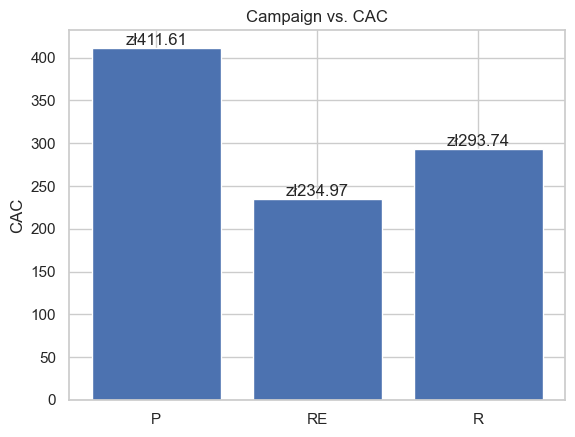

In [143]:
campSum = df.groupby(by=['Campaign'], sort=False).sum()
campCAC = campSum['Spent']/campSum['Conversions']
# Creating our bar plot
plt.bar(campCAC.index, campCAC)
plt.ylabel("CAC")
plt.title("Campaign vs. CAC")
for x,y in zip(campCAC.index, campCAC):

    label = "zł{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

Which Campaign has the lowest Cost per Click?

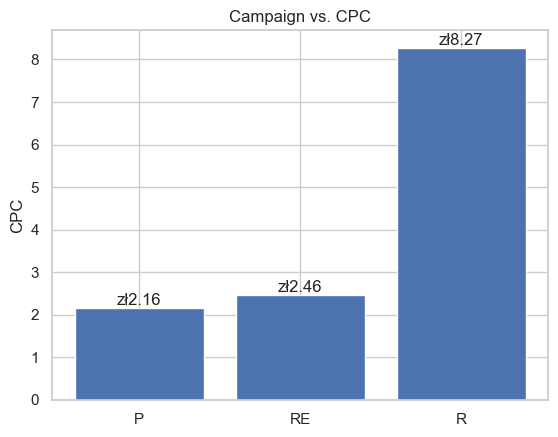

In [144]:
campCPC = campSum['Spent']/campSum['Clicks']
# Creating our bar plot
plt.bar(campCPC.index, campCPC)
plt.ylabel("CPC")
plt.title("Campaign vs. CPC")
for x,y in zip(campCPC.index, campCPC):

    label = "zł{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

CAC and CPC on Remarketing seems to be too high due to it should focus on targeting users who are nearly conversion, which mean had visited a website, added products to a cart, or did initial checkout. It means that Remarketing needs better ads because CTR is quite low and more effective messages or custom audiences are not set up properly. We'll have a closer look at Remarketing Audiences.

# Part II - Audiences

Let's have a look on best performing Audiences by Age

In [238]:
interestAgeSum = df.groupby(by = ['Audiences', 'Age']).sum()
interestAgeCAC = interestAgeSum['Spent']/interestAgeSum['Conversions']
interestAgeSumCAC = interestAgeSum.merge(interestAgeCAC.rename('CAC'), left_index=True, right_index=True)

interestAgeKeyValues = interestAgeSumCAC.sort_values(by = 'Conversions', ascending=False)
interestAgeKeyValues = interestAgeKeyValues[~(interestAgeKeyValues['Clicks'] <= 10)]  
interestAgeKeyValues = interestAgeKeyValues.drop(columns=['Ad'])
interestAgeKeyValues.reset_index(inplace=True)
print(interestAgeKeyValues.head(n =20))

    Audiences    Age  Impressions  Clicks    Spent  Conversions         CAC
0           4  35-44        40681   361.0   980.48          8.0  122.560000
1           7  45-54        35257   422.0  1257.20          7.0  179.600000
2          11  35-44         8662    65.0   876.19          6.0  146.031667
3           3  35-44        25098   438.0   943.15          5.0  188.630000
4           5  35-44        18321   219.0   527.47          5.0  105.494000
5           4  45-54        22864   250.0   660.08          4.0  165.020000
6           4  25-34        21581   139.0   401.10          3.0  133.700000
7           3  55-64         2902    90.0   134.34          2.0   67.170000
8           9  35-44         1453    24.0   228.19          2.0  114.095000
9           1  45-54         8869    98.0   269.56          2.0  134.780000
10          0  45-54        38428   608.0  1164.17          2.0  582.085000
11          7  35-44        40073   314.0  1161.92          2.0  580.960000
12          

### Part II - Audiences (Prospecting Campaign)

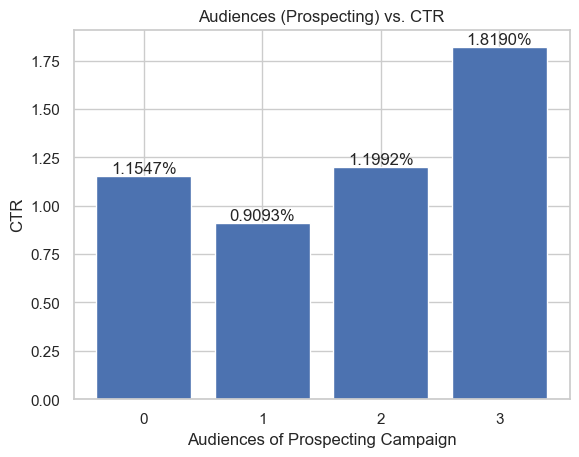

In [167]:
new_df = df[df['Campaign'] == 'P']

new_df["Audiences"] = new_df["Audiences"].astype(str)
campSum = new_df.groupby(by=['Audiences'], sort=True).sum()

campCTR = campSum['Clicks']/campSum['Impressions'] * 100

plt.bar(campCTR.index, campCTR)
plt.xlabel("Audiences of Prospecting Campaign")
plt.ylabel("CTR")
plt.title("Audiences (Prospecting) vs. CTR")


for x,y in zip(campCTR.index, campCTR):
    label = "{:.4f}%".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center')
plt.show()

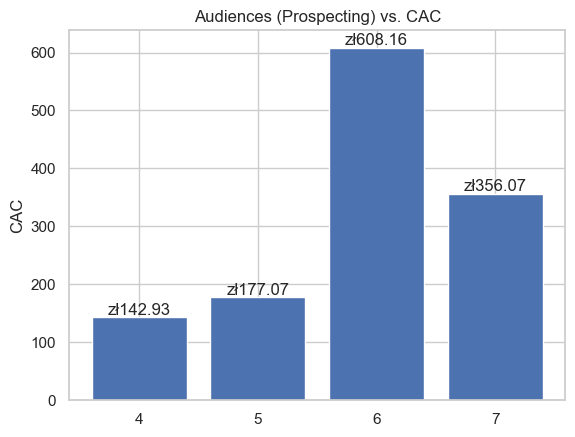

In [174]:
campSum = new_df.groupby(by=['Audiences'], sort=True).sum()
campCAC = campSum['Spent']/campSum['Conversions']

# Create bar plot
plt.bar(campCAC.index, campCAC)
plt.ylabel("CAC")
plt.title("Audiences (Prospecting) vs. CAC")
for x,y in zip(campCAC.index, campCAC):

    label = "zł{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center')
plt.show()

In [116]:
interestSum = new_df.groupby(by=['Audiences'], sort=True).sum()
interestCAC = interestSum['Spent']/interestSum['Conversions']
interestSumCAC = interestSum.merge(interestCAC.rename('CAC'), left_index=True, right_index=True)
CACmean = [np.mean(interestSumCAC['CAC'])]*len(interestSumCAC.index)

interestKeyValues = interestSumCAC.sort_values(by = 'Audiences', ascending=True).head(n = 10)
interestKeyValues.reset_index(inplace=True)
print(interestKeyValues)

  Audiences  Impressions  Clicks    Spent  Conversions         CAC
0         0       181954  2101.0  4388.92          5.0  877.784000
1         1        35853   326.0   939.58          5.0  187.916000
2         2        15010   180.0   413.11          0.0         inf
3         3        55634  1012.0  2078.93          9.0  230.992222


As we see, definitely Audience 3 on Prospecting has the best performance. Audience 1 had the most Impressions and Clicks however does not perform well.

### Part II - Audiences (Reengagement Campaign)

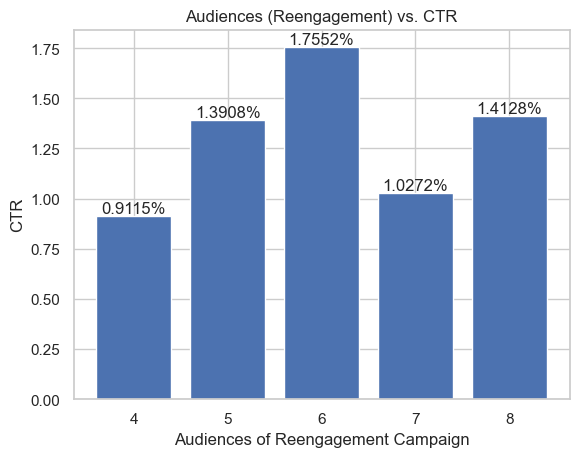

In [178]:
new_df = df[df['Campaign'] == 'RE']

new_df["Audiences"] = new_df["Audiences"].astype(str)
campSum = new_df.groupby(by=['Audiences'], sort=True).sum()

campCTR = campSum['Clicks']/campSum['Impressions'] * 100

plt.bar(campCTR.index, campCTR)
plt.xlabel("Audiences of Reengagement Campaign")
plt.ylabel("CTR")
plt.title("Audiences (Reengagement) vs. CTR")


for x,y in zip(campCTR.index, campCTR):
    label = "{:.4f}%".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center')
plt.show()

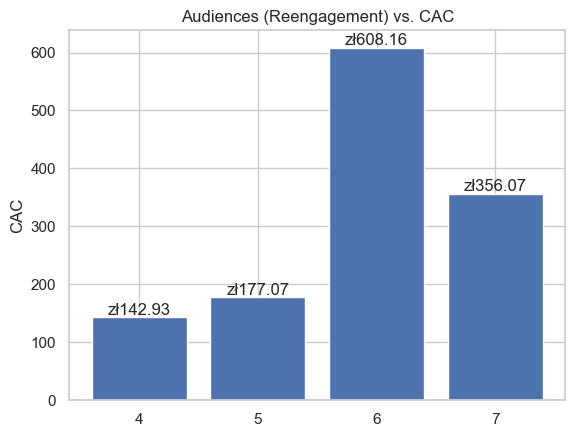

In [180]:
campSum = new_df.groupby(by=['Audiences'], sort=True).sum()
campCAC = campSum['Spent']/campSum['Conversions']

# Create bar plot
plt.bar(campCAC.index, campCAC)
plt.ylabel("CAC")
plt.title("Audiences (Reengagement) vs. CAC")
for x,y in zip(campCAC.index, campCAC):

    label = "zł{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center')
plt.show()

In [172]:
interestSum = new_df.groupby(by=['Audiences'], sort=True).sum()
interestCAC = interestSum['Spent']/interestSum['Conversions']
interestSumCAC = interestSum.merge(interestCAC.rename('CAC'), left_index=True, right_index=True)
CACmean = [np.mean(interestSumCAC['CAC'])]*len(interestSumCAC.index)

interestKeyValues = interestSumCAC.sort_values(by = 'Audiences', ascending=True).head(n = 10)
interestKeyValues.reset_index(inplace=True)
print(interestKeyValues)

  Audiences                   Ad  Impressions  Clicks    Spent  Conversions  \
0         4  2957705815467895304        94903   865.0  2286.93         16.0   
1         5  1788934034282093450        42061   585.0  1239.51          7.0   
2         6  1717376669659932112        21365   375.0   608.16          1.0   
3         7  3005410719083996196       102418  1052.0  3204.59          9.0   
4         8  1788934035484833450        19252   272.0   414.67          0.0   

          CAC  
0  142.933125  
1  177.072857  
2  608.160000  
3  356.065556  
4         inf  


Audience 4 and 5 has the best performance with the lowest CAC. It might be good to work on Ads on Audience 4 to achive better CTR.

### Part II - Audiences (Remarketing Campaign)

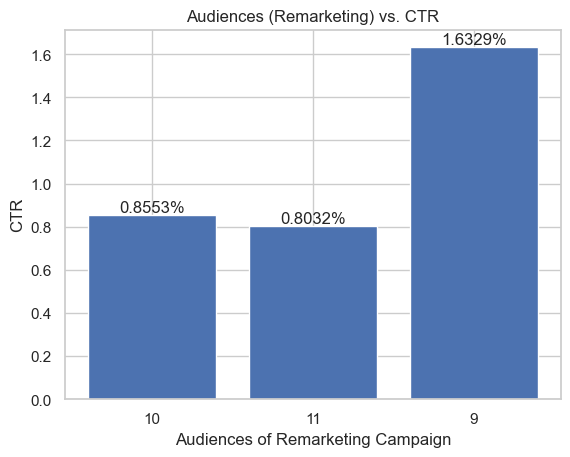

In [203]:
new_df = df[df['Campaign'] == 'R']


new_df["Audiences"] = new_df["Audiences"].astype(str)

campSum = new_df.groupby(by=['Audiences'], sort=True).sum()

campCTR = campSum['Clicks']/campSum['Impressions'] * 100

plt.bar(campCTR.index, campCTR)
plt.xlabel("Audiences of Remarketing Campaign")
plt.ylabel("CTR")
plt.title("Audiences (Remarketing) vs. CTR")


for x,y in zip(campCTR.index, campCTR):
    label = "{:.4f}%".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center')
plt.show()

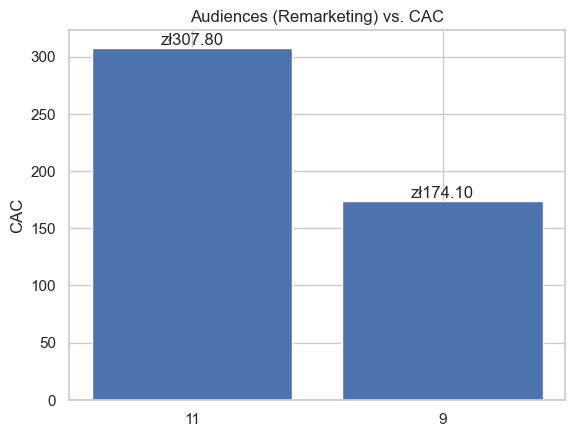

In [189]:
campSum = new_df.groupby(by=['Audiences'], sort=True).sum()
campCAC = campSum['Spent']/campSum['Conversions']

# Create bar plot
plt.bar(campCAC.index, campCAC)
plt.ylabel("CAC")
plt.title("Audiences (Remarketing) vs. CAC")
for x,y in zip(campCAC.index, campCAC):

    label = "zł{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center')
plt.show()

In [187]:
interestSum = new_df.groupby(by=['Audiences'], sort=True).sum()
interestCAC = interestSum['Spent']/interestSum['Conversions']
interestSumCAC = interestSum.merge(interestCAC.rename('CAC'), left_index=True, right_index=True)
CACmean = [np.mean(interestSumCAC['CAC'])]*len(interestSumCAC.index)

interestKeyValues = interestSumCAC.sort_values(by = 'Audiences', ascending=True).head(n = 10)
interestKeyValues.reset_index(inplace=True)
print(interestKeyValues)

  Audiences                   Ad  Impressions  Clicks    Spent  Conversions  \
0        10  2385246951695514600         9587    82.0   260.51          0.0   
1        11  2432951860374765492        25150   202.0  2154.61          7.0   
2         9  2409099386231265046         4348    71.0   522.29          3.0   

          CAC  
0         inf  
1  307.801429  
2  174.096667  


The Audience 9 performing quite well here but the rest needs better Ads and more effective message because for that level of Campaign it should have much lower CAC.

# Part III - Age

In [223]:
ageSum = df.groupby(by=['Age']).sum()
# Drop Ad and Audiences as they are not relevant here
ageSum.drop(['Audiences', 'Ad'], axis=1, inplace=True)

,Impressions,Clicks,Spent,Conversions
Age,,,,
18-24,25943,204.0,501.91,3.0
25-34,132441,1107.0,3135.94,6.0
35-44,240277,2638.0,7391.64,30.0
45-54,154203,2223.0,5626.74,19.0
55-64,37760,694.0,1335.53,3.0


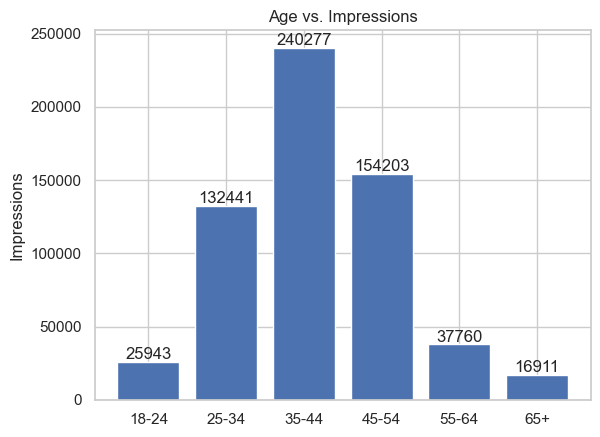

In [207]:
plt.bar(ageSum.index, ageSum['Impressions'])
plt.ylabel("Impressions")
plt.title("Age vs. Impressions")
for x,y in zip(ageSum.index, ageSum['Impressions']):

    label = "{:.0f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center')
plt.show()

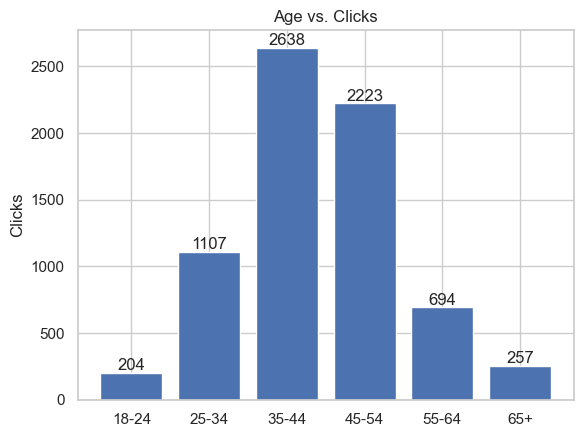

In [208]:
plt.bar(ageSum.index, ageSum['Clicks'])
plt.ylabel("Clicks")
plt.title("Age vs. Clicks")
for x,y in zip(ageSum.index, ageSum['Clicks']):

    label = "{:.0f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center')
plt.show()

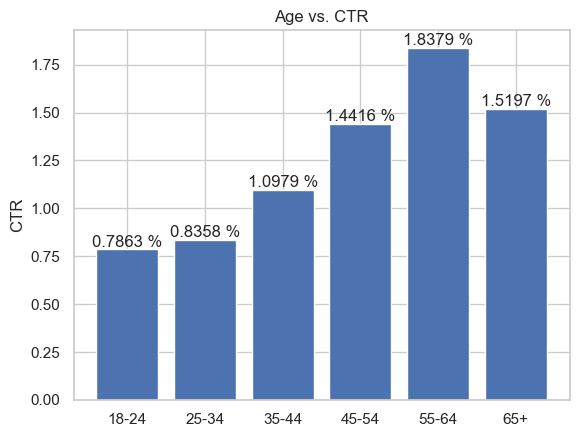

In [210]:
ageCTR = ageSum['Clicks']/ageSum['Impressions']*100
plt.bar(ageCTR.index, ageCTR)
plt.ylabel("CTR")
plt.title("Age vs. CTR")
for x,y in zip(ageCTR.index, ageCTR):

    label = "{:.4f} %".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center')
plt.show()

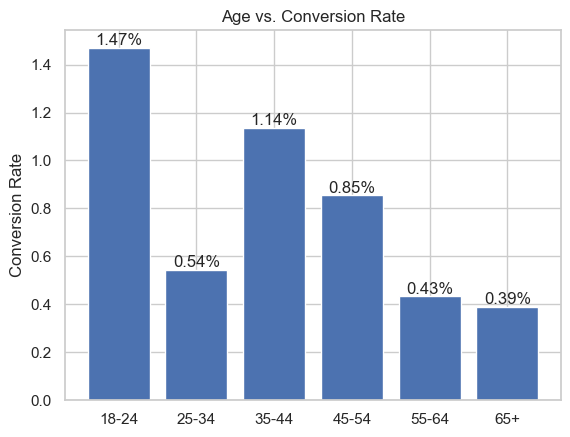

In [211]:
ageConvRate = ageSum['Conversions']/ageSum['Clicks']*100
plt.bar(ageConvRate.index, ageConvRate)
plt.ylabel("Conversion Rate")
plt.title("Age vs. Conversion Rate")
for x,y in zip(ageConvRate.index, ageConvRate):

    label = "{:.2f}%".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

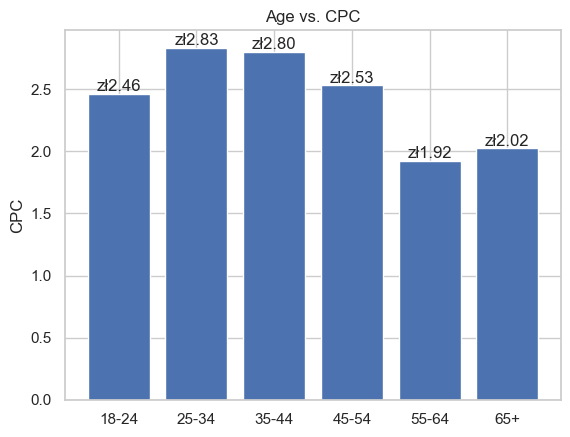

In [220]:
ageCPC = ageSum['Spent']/ageSum['Clicks']

plt.bar(ageCPC.index, ageCPC)
plt.ylabel("CPC")
plt.title("Age vs. CPC")
for x,y in zip(ageCPC.index, ageCPC):

    label = "zł{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center')
plt.show()

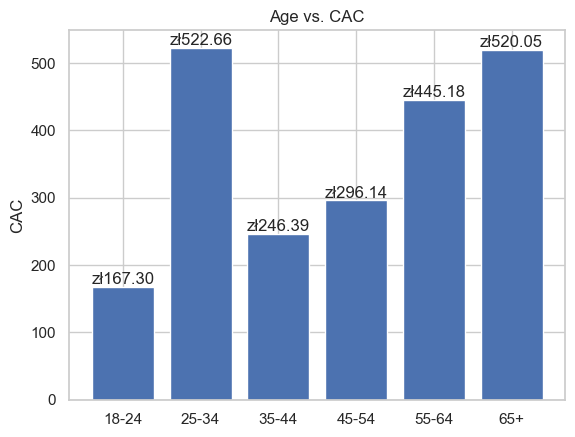

In [221]:
ageCAC = ageSum['Spent']/ageSum['Conversions']
plt.bar(ageCAC.index, ageCAC)
plt.ylabel("CAC")
plt.title("Age vs. CAC")
for x,y in zip(ageCAC.index, ageCAC):

    label = "zł{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,2), 
                 ha='center')
plt.show()

The 18-24 Age needs more testing, more impression with differents Ads. \
Users on 25-34 are not the best choice due to hight CAC. \
We can see it cleary, Age 35-44 and 45-54 got the most impressions and perform the best of all. There is still a room to improve CTR, so it might be good to try different ADs.

# Conclusion & Business Insights

### Campaigns

1. Reengagement is definitely the best converting campaign in this funnel and has the lowest CAC.
3. Remarketing has too high CAC and CPC due to it should focus on targeting users who are nearly  so needs better ads what we can see looking at CTR.

### Audiences

1. Audience 3 on Prospecting has the best performance.
2. Audience 1 had the most Impressions and Clicks however does not perform well.

### Age

1. Ages 18-24 needs more testing, more impression with differents Ads.
2. Ages 25-34 are not the best choice due to hight CAC.
3. Ages 35-44 and 45-54 got the most impressions and perform the best of all. There is still a room to improve CTR, so it might be good to try different ADs.